# 資料科學家養成全書 ch11 綜合練習問題

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 使用skearn.dataset手寫數字資料(load_digits)預測各數字，請製作多個模型，顯示混淆矩陣，進行比較要選擇哪個模型？

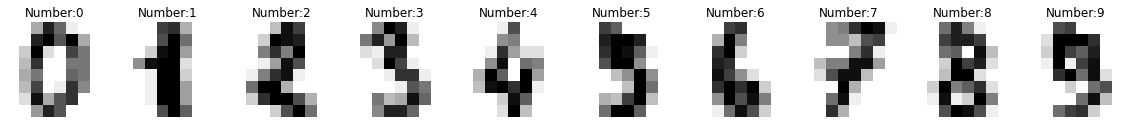

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

plt.figure(figsize=(20,5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Number:{label}')

In [3]:
from sklearn.model_selection import train_test_split

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

分類模型，嘗試Logistic Regression, Deceision Tree, Random Forest, SVM, KNN

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

scores = {}
for model_name, model in models.items():
    fit_model = model.fit(x_train, y_train)
    y_pred = fit_model.predict(x_test)
    confusion_m = confusion_matrix(y_test,y_pred)
    scores[(model_name,'train')] = fit_model.score(x_train, y_train)
    scores[(model_name,'test')] = fit_model.score(x_test,y_test)
    scores[(model_name,'f1_score')] = f1_score(y_test,y_pred,average='weighted')
    print(f'{model_name} Confusion_metrix:')
    print(confusion_m)
    print()

C:\Users\angel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Confusion_metrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]

DecisionTree Confusion_metrix:
[[33  0  0  2  1  1  0  0  0  0]
 [ 0 39  0  1  1  0  0  0  2  0]
 [ 1  0 36  3  1  0  0  0  1  2]
 [ 0  1  5 34  0  0  0  1  3  1]
 [ 1  2  0  0 34  0  0  0  0  1]
 [ 1  0  1  3  0 41  0  0  0  2]
 [ 0  1  0  1  0  0 50  0  0  0]
 [ 0  0  0  0  2  2  0 37  2  5]
 [ 0  2  1  3  0  0  0  0 40  2]
 [ 0  1  2  3  1  3  0  0  0 37]]

RandomForest Confusion_metrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 1  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  

In [5]:
pd.Series(scores).unstack()

,f1_score,test,train
DecisionTree,0.848093,0.846667,1.000000
KNN,0.979918,0.980000,0.991091
LogisticRegression,0.951316,0.951111,1.000000
RandomForest,0.975625,0.975556,1.000000
SVM,0.991111,0.991111,0.994803


比較train, test 與f1-score，以SVM模型分數最高，其次為KNN，再者為Random Forest

### 讀取2001/1/2至2016/12/30為止的美元/日圓(JPYUSD)、歐元/美元(USDEUR)的匯率資料，並回答下列問題:

In [6]:
import pandas_datareader.data as pdr
start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpus_data = pdr.DataReader("DEXJPUS","fred",start_date,end_date)
fx_useu_data = pdr.DataReader("DEXUSEU","fred",start_date,end_date)

In [7]:
fx_jpus_data.head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97


In [8]:
fx_useu_data.head()

,DEXUSEU
DATE,
2001-01-02,0.9465
2001-01-03,0.9473
2001-01-04,0.9448
2001-01-05,0.9535
2001-01-08,0.9486


#### 請將遺漏的資料利用前一天的資料進行填補。

In [9]:
fx_jpus_data = fx_jpus_data.fillna(method='ffill')
fx_useu_data = fx_useu_data.fillna(method='ffill')

In [10]:
fx_jpus_data.isnull().any()

DEXJPUS    False
dtype: bool

In [11]:
fx_useu_data.isnull().any()

DEXUSEU    False
dtype: bool

In [12]:
fx_jpus_data.describe()

,DEXJPUS
count,4174.000000
mean,105.775220
std,14.612526
min,75.720000
25%,95.365000
50%,108.105000
75%,118.195000
max,134.770000


<AxesSubplot:xlabel='DATE'>

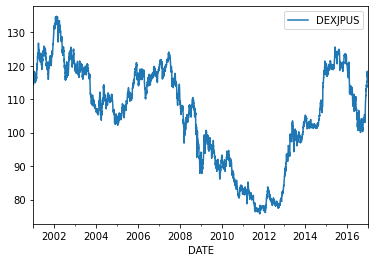

In [13]:
fx_jpus_data.plot()

In [14]:
fx_useu_data.describe()

,DEXUSEU
count,4174.000000
mean,1.239633
std,0.165265
min,0.837000
25%,1.128100
50%,1.274700
75%,1.352575
max,1.601000


<AxesSubplot:xlabel='DATE'>

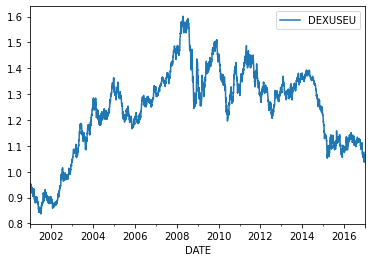

In [15]:
fx_useu_data.plot()

#### 請取得當日與前一日的差，將各自的變化率「(當日-前日)/前日」得資料以直方圖顯示。

In [16]:
fx_jpus_data_ratio = (fx_jpus_data - fx_jpus_data.shift(1)) / fx_jpus_data.shift(1)
fx_useu_data_ratio = (fx_useu_data - fx_useu_data.shift(1)) / fx_useu_data.shift(1)

array([[<AxesSubplot:title={'center':'DEXJPUS'}>]], dtype=object)

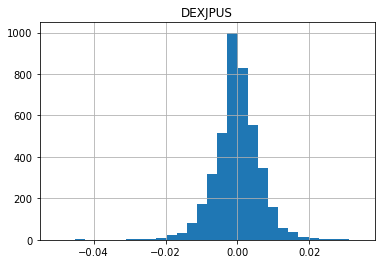

In [17]:
fx_jpus_data_ratio.hist(bins=30)

array([[<AxesSubplot:title={'center':'DEXUSEU'}>]], dtype=object)

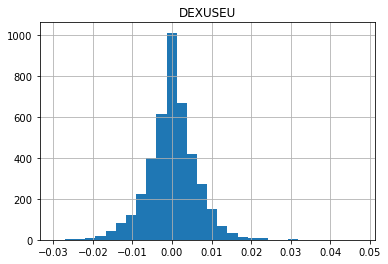

In [18]:
fx_useu_data_ratio.hist(bins=30)

#### 將2016/11作為訓練資料，當日的價格作為目標變數，使用前日、前二日、前三日的價格資料來建構線性迴歸模型，將2016/12做為測試資料來進行驗證。

In [19]:
jpus_data = pd.concat([fx_jpus_data,fx_jpus_data.shift(1),fx_jpus_data.shift(2),fx_jpus_data.shift(3)], axis=1)
jpus_data.columns = ['today','pre_1','pre_2','pre_3']
jpus_data.head()

,today,pre_1,pre_2,pre_3
DATE,,,,
2001-01-02,114.73,NaN,NaN,NaN
2001-01-03,114.26,114.73,NaN,NaN
2001-01-04,115.47,114.26,114.73,NaN
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26


In [20]:
jpus_data.dropna(inplace=True)
jpus_data.head()

,today,pre_1,pre_2,pre_3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97


In [21]:
x_train = jpus_data['2016-11'].loc[:,['pre_1','pre_2','pre_3']]
x_train.head()

,pre_1,pre_2,pre_3
DATE,,,
2016-11-01,105.07,105.40,105.14
2016-11-02,104.59,105.07,105.40
2016-11-03,103.22,104.59,105.07
2016-11-04,103.17,103.22,104.59
2016-11-07,103.02,103.17,103.22


In [22]:
y_train = jpus_data['2016-11']['today']
y

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
x_test = jpus_data['2016-12'].loc[:,['pre_1','pre_2','pre_3']]
y_test = jpus_data['2016-12']['today']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'model(train): {model.score(x_train,y_train)}')
print(f'model(test): {model.score(x_test,y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

model(train): 0.9509299545649994
model(test): 0.5404389520765218
MSE: 1.127372374614738
MAE: 0.8059759579835363
R2: 0.5404389520765218
